In [ ]:
from scipy.stats import f_oneway
from scipy.stats import t
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

# **MILESTONE 1**

In [2]:
# Importing the necessary libraries

In [3]:
# Loading the data
data = pd.read_csv("insurance_data.csv")
data.head(5)

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50
1,37,0,Married,86,1-5 years,50,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100
2,49,0,Married,86,1-5 years,50,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100
3,62,1,Married,86,>5 years,0,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100
4,36,0,Single,0,>5 years,0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50


In [4]:
# Check age distribution for seniors
print(data[data['Is_Senior'] == 1]['Age'].describe())

# Check age distribution for non-seniors
print(data[data['Is_Senior'] == 0]['Age'].describe())

count    1593.000000
mean       62.419335
std         6.699391
min        55.000000
25%        57.000000
50%        61.000000
75%        66.000000
max        90.000000
Name: Age, dtype: float64
count    8407.000000
mean       35.742001
std        10.627300
min        18.000000
25%        27.000000
50%        36.000000
75%        44.000000
max        54.000000
Name: Age, dtype: float64


In [5]:
data['Is_Senior'] = np.where(data['Age'] >= 55, 1, 0)

# Data Exploration

In [6]:
# Data Preprocessing
rows, cols = data.shape
attributes = data.columns.tolist()
print("Number of rows and columns:", rows, cols)
print("Attributes:", attributes)

Number of rows and columns: 10000 27
Attributes: ['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount', 'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment', 'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment', 'Policy_Type', 'Policy_Adjustment', 'Premium_Amount', 'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount', 'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact', 'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested', 'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit', 'Region', 'Premium_Adjustment_Region']


In [7]:
# Missing Values
print(f"Total missing values: {data.isna().sum().sum()}")

# Duplicate Rows
print(f"Total duplicate rows: {data.duplicated().sum()}")

# Data Structure
print(data.info())

# Statistical Analysis
print(data.describe())

Total missing values: 0
Total duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium

In [8]:
# Categorical Feature Analysis
categorical_features = data.select_dtypes(include=['object']).nunique()
print("Unique values per categorical feature:")
print(categorical_features)

Unique values per categorical feature:
Marital_Status     4
Prior_Insurance    3
Claims_Severity    3
Policy_Type        2
Source_of_Lead     3
Region             3
dtype: int64


# Exploratory Data Analysis


**Univariate Analysis**

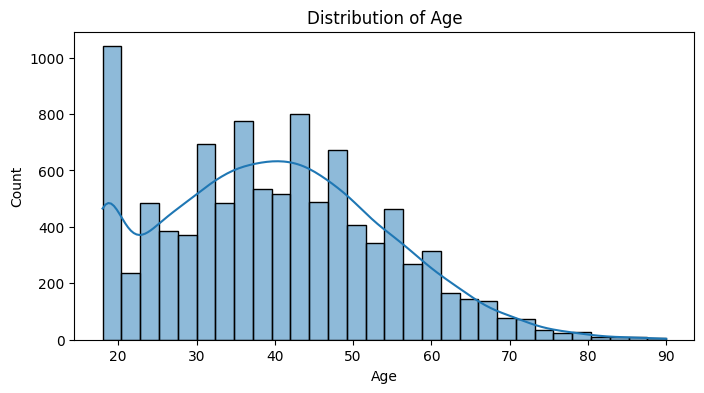

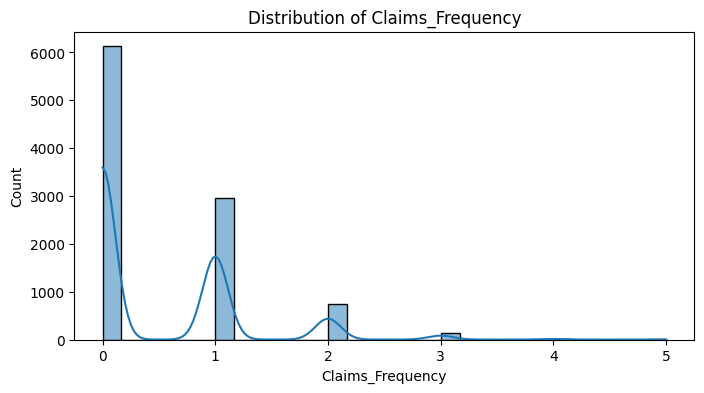

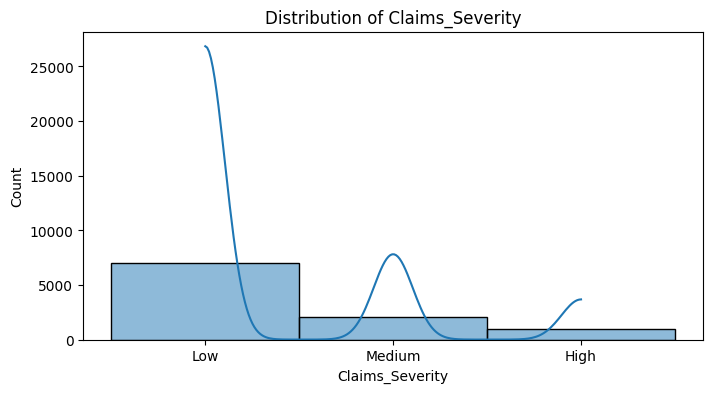

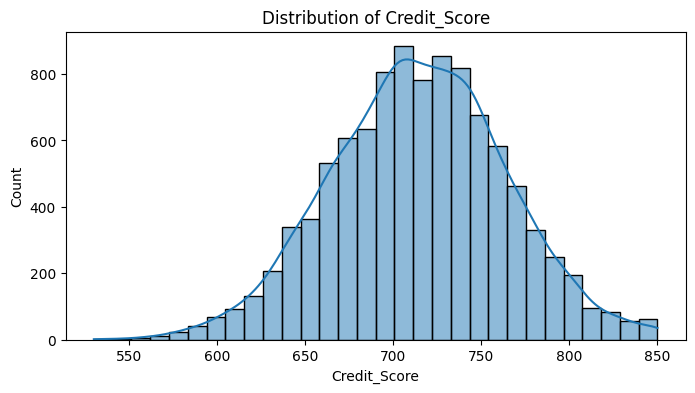

In [9]:
# Plot histograms for numerical features
numerical_features = ['Age', 'Claims_Frequency', 'Claims_Severity', 'Credit_Score']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

**Bivariate Analysis**

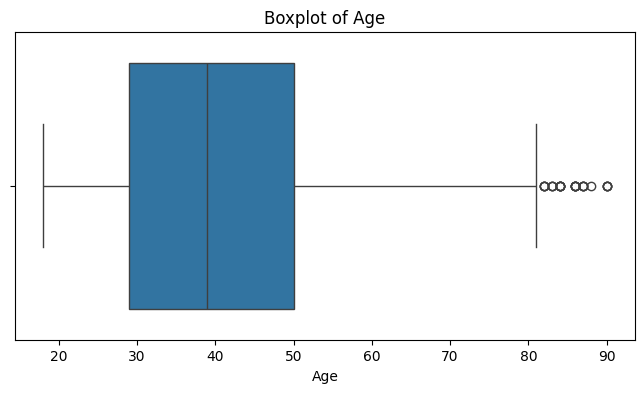

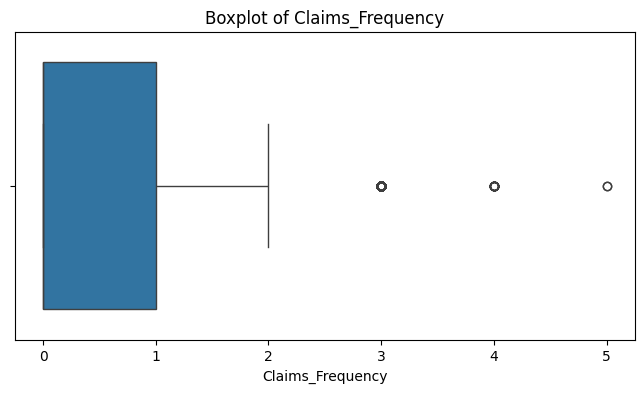

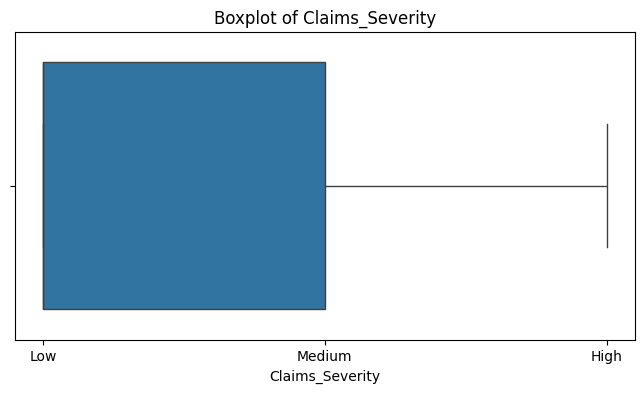

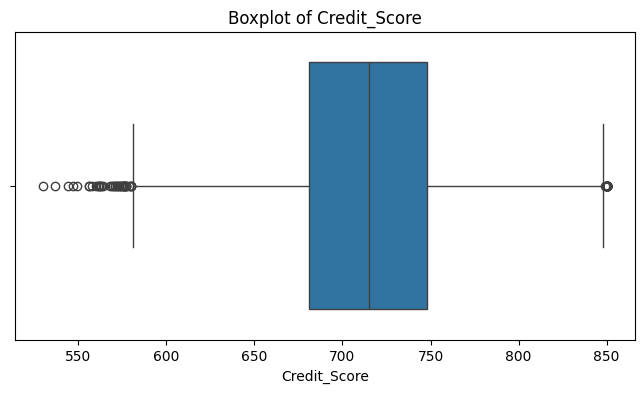

In [10]:
# Plot boxplots to check for outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

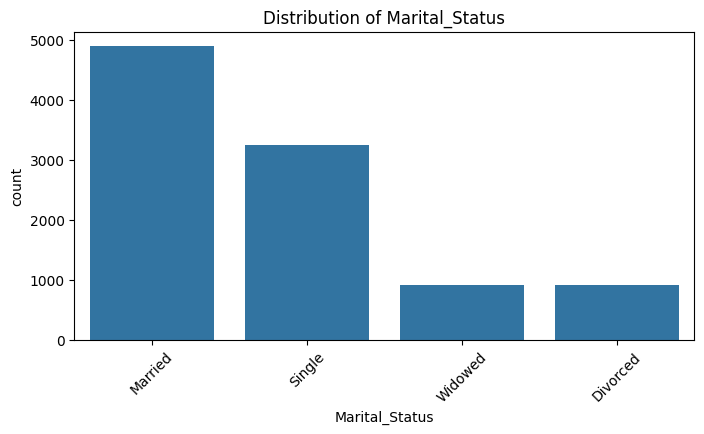

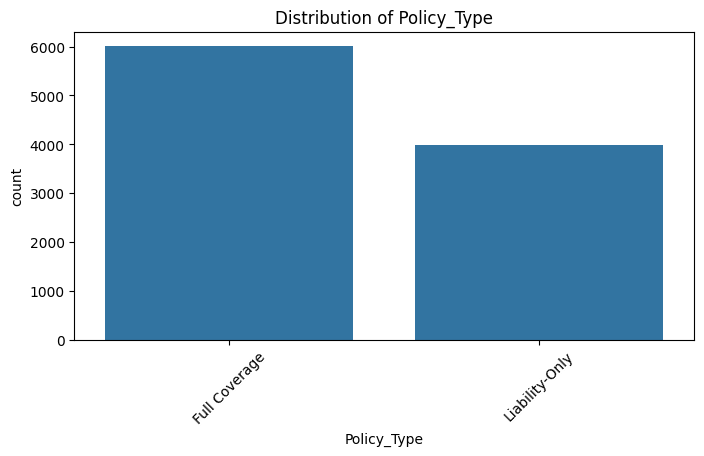

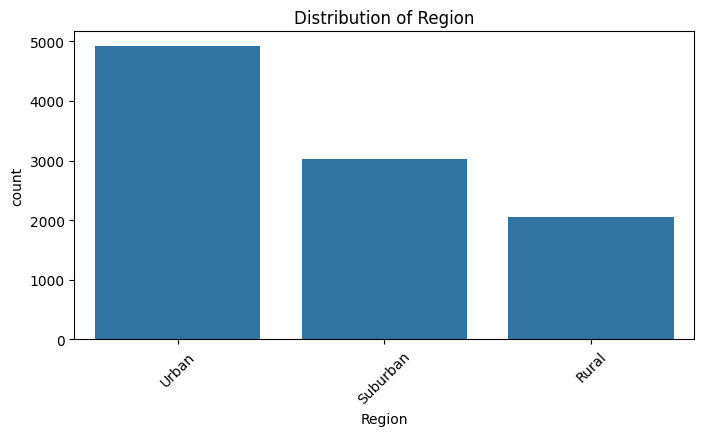

In [11]:
categorical_features = ['Marital_Status', 'Policy_Type', 'Region']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[feature], order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

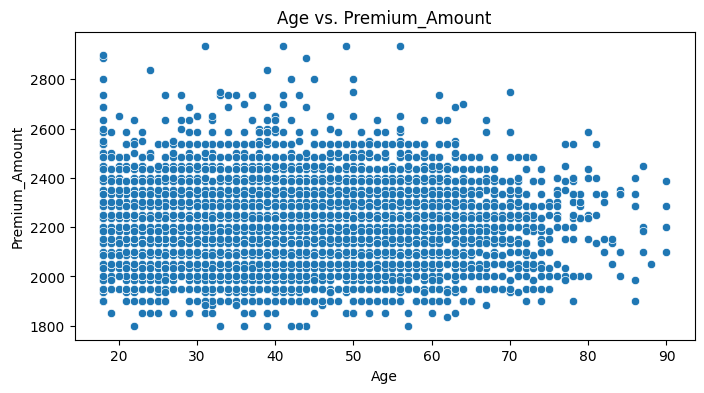

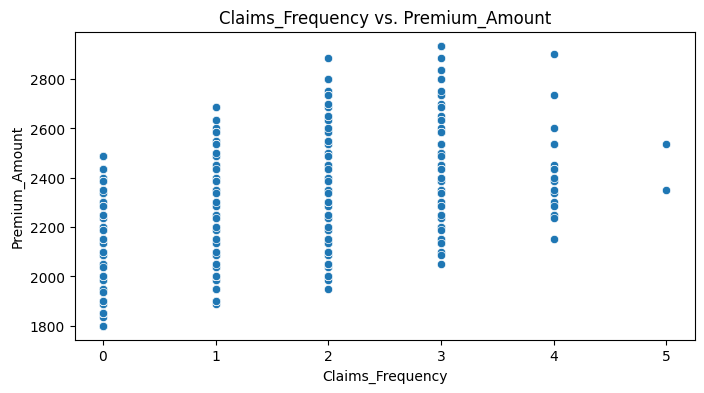

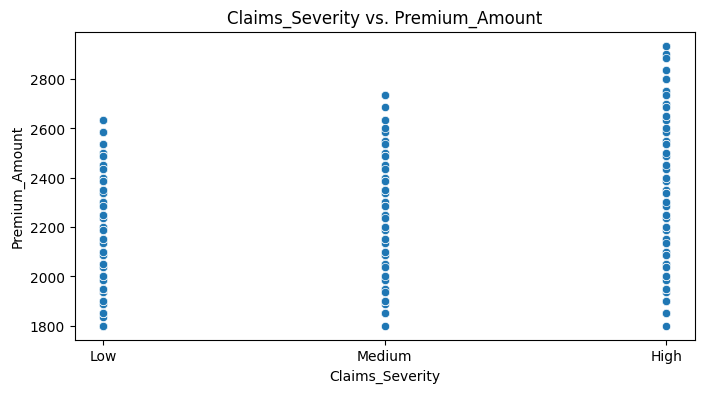

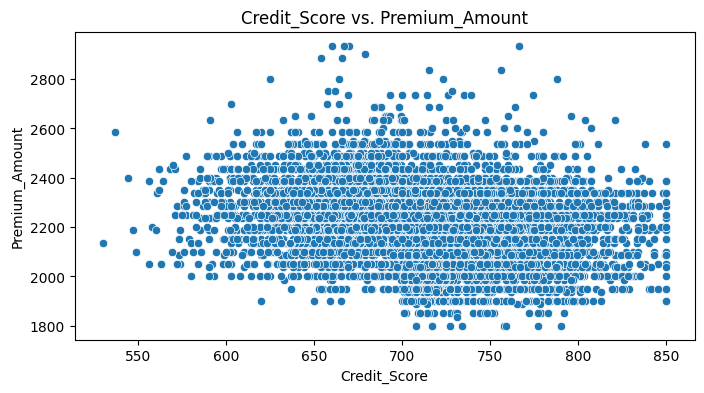

In [12]:
# Scatterplots for numerical features vs. Premium_Amount
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=data[feature], y=data['Premium_Amount'])
    plt.title(f'{feature} vs. Premium_Amount')
    plt.show()

1. Age
-> Observation: Premiums are equally distributed across age groups, but there are specific data points at ages 20, 30, 40, 50, and 60 with premiums around 2800.

-> Insight: Age alone may not be a strong predictor of premiums, but the spikes at specific ages (e.g., 20, 30, 40, 50, 60) suggest that certain age thresholds might influence premiums. This could be due to policy rules or discounts applied at these ages.

2. Claims Frequency
-> Observation: Claims frequency is evenly distributed, but claims frequencies of 2 and 3 tend to have higher premiums (reaching 2800). A claims frequency of 5 has only a few data points in the middle range.

-> Insight: Higher claims frequencies (2 and 3) are associated with higher premiums, which makes sense—customers with more claims are riskier to insure. However, the relationship isn’t perfectly linear, as a claims frequency of 5 doesn’t show the highest premiums. This could indicate that other factors (e.g., claims severity, discounts) are also at play.

3. Claims Severity
-> Observation: Higher claims severity is associated with higher premiums, but the distribution is even.

-> Insight: This is expected—more severe claims lead to higher premiums. However, the even distribution suggests that claims severity alone isn’t the sole driver of premiums. Other factors (e.g., policy type, discounts) might moderate this relationship.

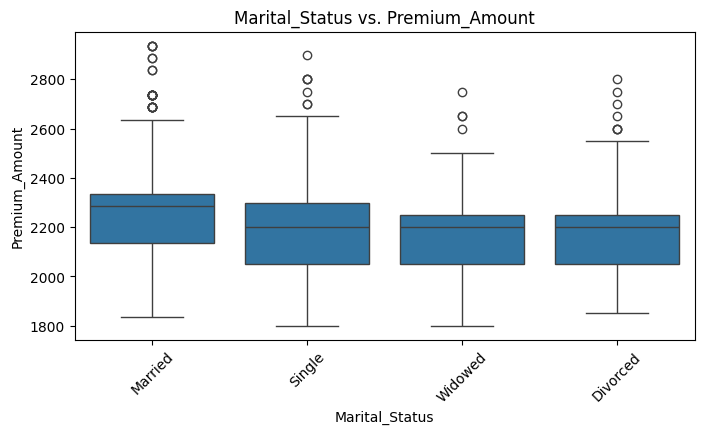

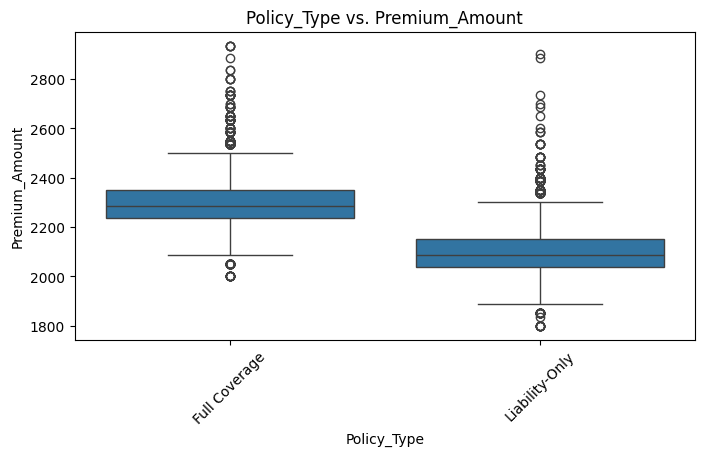

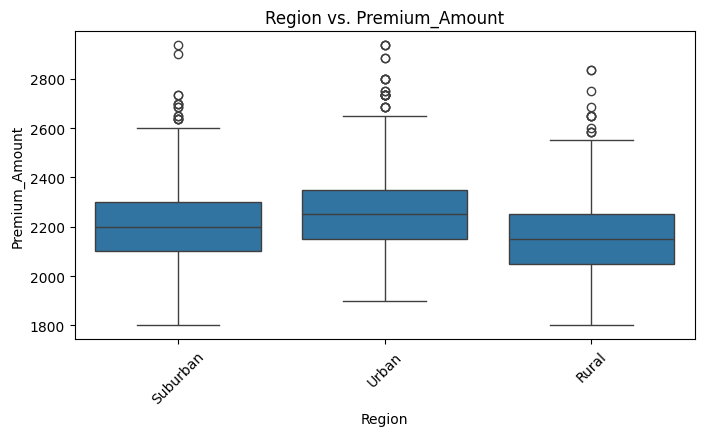

In [13]:
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature], y=data['Premium_Amount'])
    plt.title(f'{feature} vs. Premium_Amount')
    plt.xticks(rotation=45)
    plt.show()

1. Policy Type
-> Observation: Liability-only policies have higher quartiles (75th percentile) compared to full-coverage policies, but the overall spread (length of the boxplot) and number of outliers are similar.

-> Insight: This is counterintuitive—typically, full-coverage policies are more expensive. This could indicate:

- Liability-only policies are chosen by higher-risk drivers, leading to higher premiums. There might be interactions with other features (e.g., discounts, region) that influence premiums differently for each policy type.

2. Region
-> Observation: Premiums are significantly higher in urban areas.

-> Insight: This is expected—urban areas typically have higher risk (e.g., more traffic, higher likelihood of accidents or theft), leading to higher premiums. This feature is likely to be a strong predictor in my model.

# Correlation Analysis


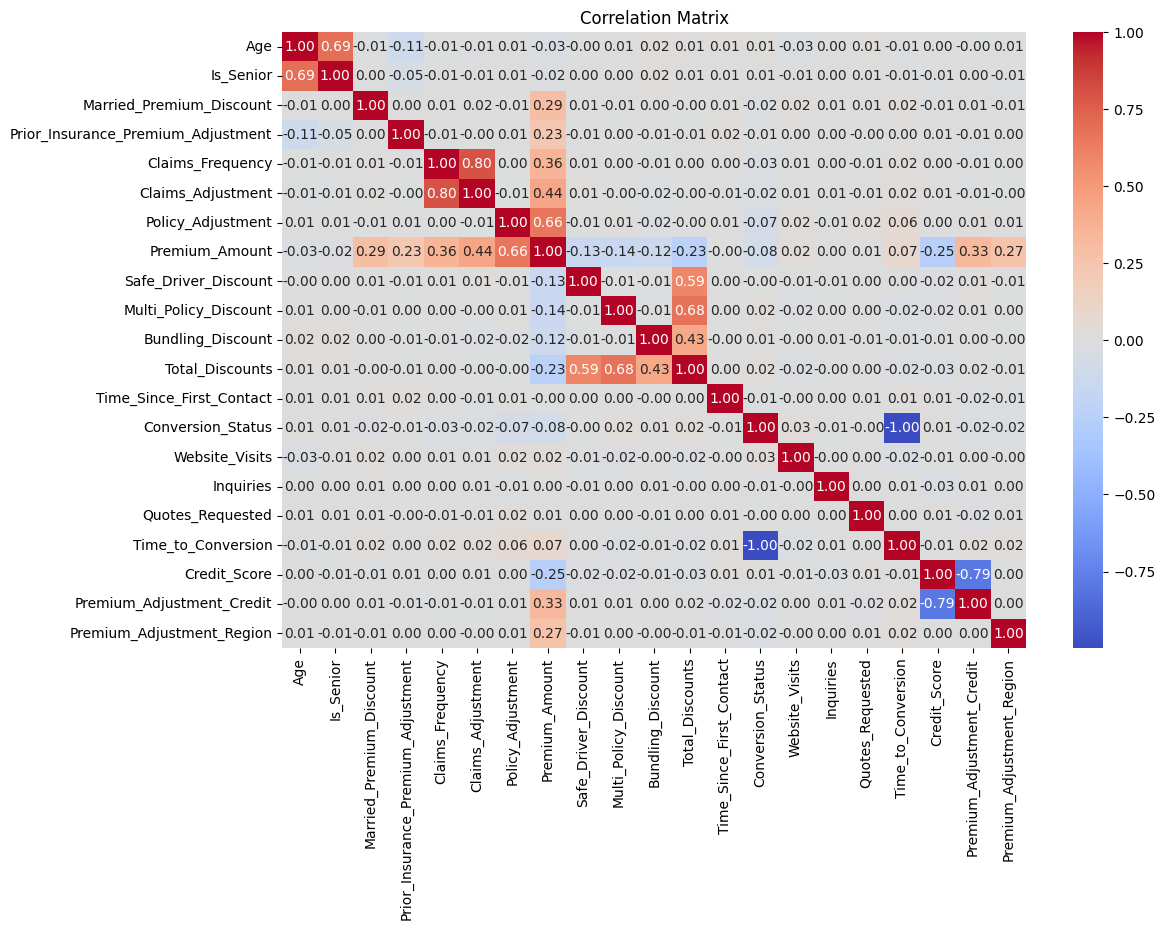

Premium_Amount                        1.000000
Policy_Adjustment                     0.663374
Claims_Adjustment                     0.439130
Claims_Frequency                      0.355371
Premium_Adjustment_Credit             0.325845
Married_Premium_Discount              0.291593
Premium_Adjustment_Region             0.265795
Credit_Score                          0.251238
Prior_Insurance_Premium_Adjustment    0.234541
Total_Discounts                       0.228695
Multi_Policy_Discount                 0.144375
Safe_Driver_Discount                  0.131944
Bundling_Discount                     0.117614
Conversion_Status                     0.078765
Time_to_Conversion                    0.074710
Age                                   0.029541
Website_Visits                        0.024758
Is_Senior                             0.016341
Quotes_Requested                      0.007680
Inquiries                             0.002993
Time_Since_First_Contact              0.001183
Name: Premium

In [14]:
# Identify numerical columns
numerical_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with Premium_Amount
correlation_with_target = correlation_matrix['Premium_Amount'].abs().sort_values(ascending=False)
print(correlation_with_target)

Correlation values range from **-1 to 1**, where:  
- **1**: Perfect positive correlation (variables move in the same direction).  
- **-1**: Perfect negative correlation (variables move in opposite directions).  
- **0**: No linear relationship.  

**Key insights** from the above matrix:

**1. Strong Correlations to Focus On**  
**Premium_Amount** (the target variable):  
- **Policy_Adjustment (0.66)**: Strong positive correlation. Adjustments to policies likely drive higher premiums.  
- **Claims_Adjustment (0.44)**: Higher claim adjustments correlate with higher premiums.  
- **Credit_score (-0.25)**: Negative correlation. Lower credit scores may lead to higher premiums.  
- **Premium_Adjustment_Region (0.27)**: Regional factors slightly influence premiums.  

**Claims_Frequency & Claims_Adjustment (0.80)**:  
- Very strong positive correlation. Frequent claims lead to more claim adjustments (expected).  

**Credit_score & Premium_Adjustment_Credit (-0.79)**:  
- Strong negative correlation. Credit scores heavily influence credit-based premium adjustments.  

**Conversion_Status & Time_to_Conversion (-1.00)**:  
- Perfect correlation (likely a data issue).

**2. Unexpected or Odd Correlations**  
- **Premium_Amount & Safe_Driver_Discount (-0.13)**:  
  - Slight negative correlation. Safe drivers might receive discounts, lowering premiums. This aligns with my intuition.  

- **Total_Discounts & Premium_Amount (-0.23)**:  
  - Negative correlation. More discounts reduce premiums (expected).  

**3. Multicollinearity Warnings**  
Variables with **|r| > 0.7** may cause multicollinearity in regression models. Consider:  
- **Claims_Frequency & Claims_Adjustment (0.80)**  
- **Credit_score & Premium_Adjustment_Credit (0.79)**  
- **Policy_Adjustment & Premium_Amount (0.66)**  

**Action**: Remove one variable from each pair or use techniques like PCA.  

**4. Weak or No Relationships**  
- **Website_Visits & Premium_Amount (0.02)**: Almost no correlation.  
- **Inquiries & Premium_Amount (0.00)**: No linear relationship.  


# Principal Component Analysis

In [15]:
# Apply PCA to Claims_Frequency & Claims_Adjustment
pca_claims = PCA(n_components=1)
data['Claims_PCA'] = pca_claims.fit_transform(data[['Claims_Frequency', 'Claims_Adjustment']])

# Apply PCA to Credit_Score & Premium_Adjustment_Credit
pca_credit = PCA(n_components=1)
data['Credit_PCA'] = pca_credit.fit_transform(data[['Credit_Score', 'Premium_Adjustment_Credit']])

In [16]:
# Drop the original multicollinear columns
data_reduced = data.drop(columns=[
    'Claims_Frequency', 'Claims_Adjustment',  # Replaced by Claims_PCA
    'Credit_Score', 'Premium_Adjustment_Credit'  # Replaced by Credit_PCA
])

In [17]:
# Standardize the data before PCA
scaler = StandardScaler()
scaled_claims = scaler.fit_transform(data[['Claims_Frequency', 'Claims_Adjustment']])
pca_claims = PCA(n_components=1)
pca_claims.fit(scaled_claims)
print("Standardized Claims_PCA Loadings:", pca_claims.components_)

Standardized Claims_PCA Loadings: [[0.70710678 0.70710678]]


In [18]:
# Check PCA loadings for Claims_PCA
print("Claims_PCA Loadings:")
print(pca_claims.components_)

# Check PCA loadings for Credit_PCA
print("Credit_PCA Loadings:")
print(pca_credit.components_)

Claims_PCA Loadings:
[[0.70710678 0.70710678]]
Credit_PCA Loadings:
[[ 0.71657079 -0.69751438]]


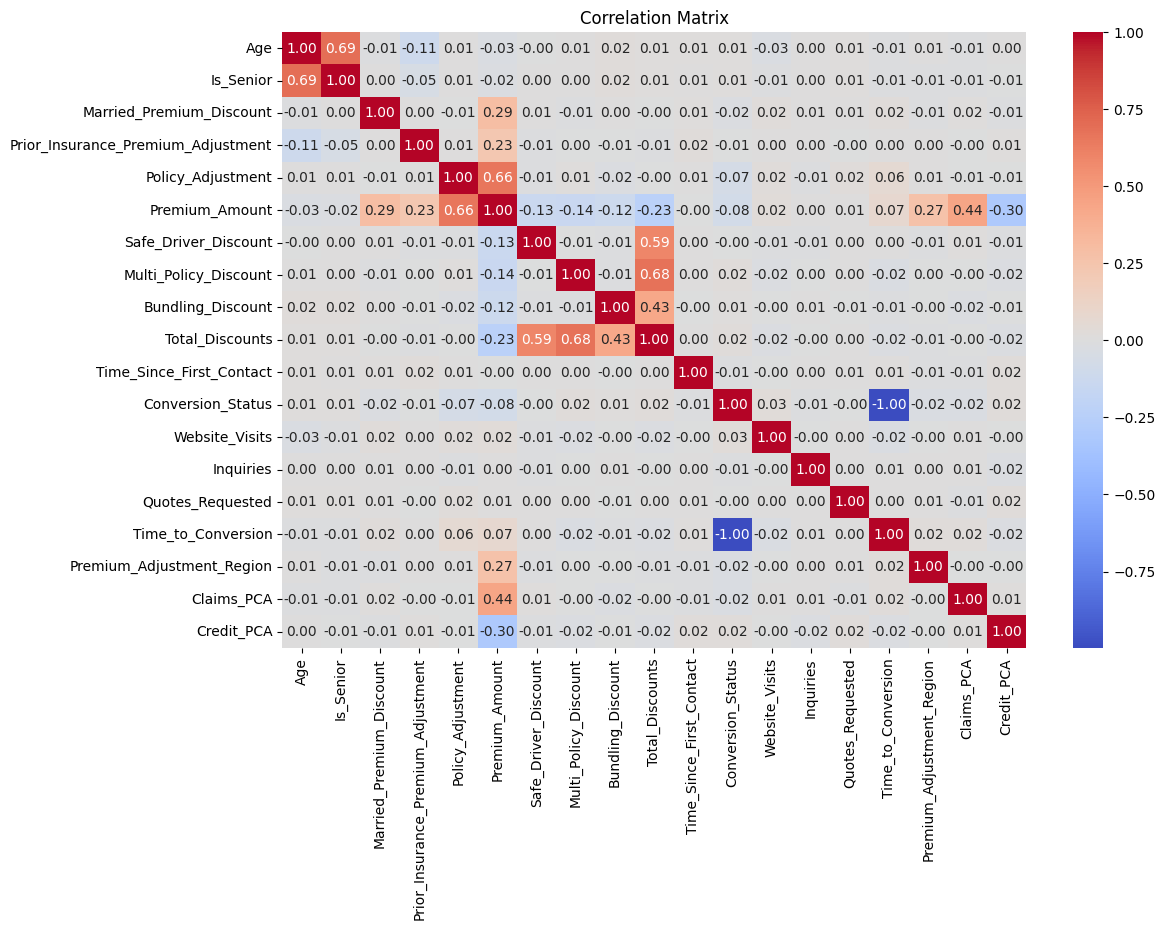

Premium_Amount                        1.000000
Policy_Adjustment                     0.663374
Claims_PCA                            0.439130
Credit_PCA                            0.304223
Married_Premium_Discount              0.291593
Premium_Adjustment_Region             0.265795
Prior_Insurance_Premium_Adjustment    0.234541
Total_Discounts                       0.228695
Multi_Policy_Discount                 0.144375
Safe_Driver_Discount                  0.131944
Bundling_Discount                     0.117614
Conversion_Status                     0.078765
Time_to_Conversion                    0.074710
Age                                   0.029541
Website_Visits                        0.024758
Is_Senior                             0.016341
Quotes_Requested                      0.007680
Inquiries                             0.002993
Time_Since_First_Contact              0.001183
Name: Premium_Amount, dtype: float64


In [19]:
# Identify numerical columns
numerical_data_pca = data_reduced.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix_pca = numerical_data_pca.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_pca, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Correlation with Premium_Amount
correlation_with_target_pca = correlation_matrix_pca['Premium_Amount'].abs().sort_values(ascending=False)
print(correlation_with_target_pca)

In [20]:
# Removing features with weak correlations
data_final = data_reduced.drop(columns=[
    'Website_Visits', 'Inquiries', 'Time_Since_First_Contact',
    'Quotes_Requested', 'Is_Senior'
])
print(data_final.columns)

Index(['Age', 'Marital_Status', 'Married_Premium_Discount', 'Prior_Insurance',
       'Prior_Insurance_Premium_Adjustment', 'Claims_Severity', 'Policy_Type',
       'Policy_Adjustment', 'Premium_Amount', 'Safe_Driver_Discount',
       'Multi_Policy_Discount', 'Bundling_Discount', 'Total_Discounts',
       'Source_of_Lead', 'Conversion_Status', 'Time_to_Conversion', 'Region',
       'Premium_Adjustment_Region', 'Claims_PCA', 'Credit_PCA'],
      dtype='object')


# Hypothesis Testing

In [21]:
#T-Test for Binary Groups (Married_Premium_Discount)
# Split data into two groups
married_premiums = data_final[data_final['Married_Premium_Discount'] == 86]['Premium_Amount']
unmarried_premiums = data_final[data_final['Married_Premium_Discount'] == 0]['Premium_Amount']

# Perform t-test
t_stat, p_value = ttest_ind(married_premiums, unmarried_premiums)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 30.481029579596264, P-Value: 3.2942262527374963e-195


**T-Test for Binary Groups (Married_Premium_Discount)**

Correlation with Target Variable: 0.29

Objective: Test if there’s a significant difference in premiums between married and unmarried individuals.

Hypotheses:

- Null Hypothesis (H₀): There is no significant difference in premiums between married and unmarried individuals.

- Alternative Hypothesis (H₁): There is a significant difference in premiums between married and unmarried individuals.


**Interpretation:**

The p-value is extremely small (much less than 0.05), so we reject the null hypothesis.

This means there is a statistically significant difference in premiums between married and unmarried individuals.

The positive T-statistic suggests that married individuals tend to have higher premiums than unmarried individuals.

*Action:
Including Married_Premium_Discount in my model, as it significantly impacts premiums.*

In [22]:
#ANOVA for Categorical Groups (Policy_Type)
# Group the data
policy_types = data_final['Policy_Type'].unique()
premiums_by_policy = [data_final[data['Policy_Type'] == policy]['Premium_Amount'] for policy in policy_types]

# Perform ANOVA
f_stat, p_value = f_oneway(*premiums_by_policy)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 7857.6335533934825, P-value: 0.0


**ANOVA for Categorical Groups (Policy_Type)**

Objective: Test if there’s a significant difference in premiums across different policy types.

Hypotheses:

- Null Hypothesis (H₀): There is no significant difference in premiums across policy types.

- Alternative Hypothesis (H₁): There is a significant difference in premiums across policy types.

**Interpretation:**

The p-value (0.0) is less than the common significance level of 0.05.

This means we reject the null hypothesis.

There is a statistically significant difference in premiums across different policy types.

*Action:
Including Policy_Type in my model, as it significantly impacts premiums.*

In [23]:
# ANOVA for Region
# Group the data
regions = data_final['Region'].unique()
premiums_by_region = [data_final[data_final['Region'] == region]['Premium_Amount'] for region in regions]

# Perform ANOVA
f_stat, p_value = f_oneway(*premiums_by_region)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 381.2953367368047, P-value: 2.6157763701190436e-160


**ANOVA for Region**

*Hypothesis:*

Null Hypothesis (H₀): There is no significant difference in premiums across suburban, urban, and rural regions.  

Alternative Hypothesis (H₁): There is a significant difference in premiums across suburban, urban, and rural regions.  

**Interpretation:**

The p-value is extremely small (much less than 0.05), leading us to reject the null hypothesis. This indicates that there is a statistically significant difference in premiums across suburban, urban, and rural regions.  

The large F-statistic further supports this conclusion, showing that the variation in premiums **between regions** is significantly larger than the variation **within regions**.

*Action:*
Since Region (suburban, urban, rural) has a statistically significant impact on premiums, it will be included in the predictive model as a key feature.  

In [24]:
# T-Test for Binary Groups (Safe_Driver_Discount)
# Split data into two groups
safe_driver_premiums = data_final[data_final['Safe_Driver_Discount'] == 1]['Premium_Amount']
non_safe_driver_premiums = data_final[data_final['Safe_Driver_Discount'] == 0]['Premium_Amount']

# Perform t-test
t_stat, p_value = ttest_ind(safe_driver_premiums, non_safe_driver_premiums)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -13.309435688543731, P-Value: 4.4694892422327614e-40


**T-Test for Binary Groups (Safe_Driver_Discount)**

Correlation with Target Varible: -0.13

Objective: Test if there’s a significant difference in premiums between safe drivers and non-safe drivers.

Hypotheses:

Null Hypothesis (H₀): There is no significant difference in premiums between safe drivers and non-safe drivers.

Alternative Hypothesis (H₁): There is a significant difference in premiums between safe drivers and non-safe drivers.

**Interpretation:**

The p-value is extremely small (much less than 0.05), so we reject the null hypothesis.

This means there is a statistically significant difference in premiums between safe drivers and non-safe drivers.

The negative T-statistic suggests that safe drivers tend to have lower premiums than non-safe drivers (or vice versa, depending on how the variable is encoded).

*Action:
Including Safe_Driver_Discount in my model makes sense, as it significantly impacts premiums.*

In [25]:
# ANOVA for Source_of_Lead
source_of_lead_groups = [data[data['Source_of_Lead'] == source]['Premium_Amount'] for source in data['Source_of_Lead'].unique()]
f_stat, p_value = f_oneway(*source_of_lead_groups)
print(f"Source_of_Lead - F-statistic: {f_stat}, P-value: {p_value}")

# ANOVA for Conversion_Status
conversion_status_groups = [data[data['Conversion_Status'] == status]['Premium_Amount'] for status in data['Conversion_Status'].unique()]
f_stat, p_value = f_oneway(*conversion_status_groups)
print(f"Conversion_Status - F-statistic: {f_stat}, P-value: {p_value}")

Source_of_Lead - F-statistic: 0.6267593440950642, P-value: 0.5343415419232609
Conversion_Status - F-statistic: 62.41430048350437, P-value: 3.07592545473042e-15


**Interpretation:**

Source_of_Lead: Not relevant. I can exclude it from my model.

Conversion_Status: Relevant. Including it in my model and explore its relationship with Premium_Amount further.

# Feature Enginering

In [26]:
# Dropping the unrelevant columns
data = data_final.drop(columns=['Source_of_Lead'])
# One-hot encode categorical columns in the entire dataset
# technique used to convert categorical variables into a format that can be provided to machine learning algorithms
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
data_encode = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Check the new columns
print(data.columns)

Index(['Age', 'Marital_Status', 'Married_Premium_Discount', 'Prior_Insurance',
       'Prior_Insurance_Premium_Adjustment', 'Claims_Severity', 'Policy_Type',
       'Policy_Adjustment', 'Premium_Amount', 'Safe_Driver_Discount',
       'Multi_Policy_Discount', 'Bundling_Discount', 'Total_Discounts',
       'Conversion_Status', 'Time_to_Conversion', 'Region',
       'Premium_Adjustment_Region', 'Claims_PCA', 'Credit_PCA'],
      dtype='object')


In [27]:
# Define features (X) and target (y)
X = data_encode.drop('Premium_Amount', axis=1) # dropping the target variable from the rest of the features
y = data_encode['Premium_Amount'] # target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 23) (2000, 23) (8000,) (2000,)


In [28]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 264.30846294237847
R-squared: 0.9886259200337796


**Interpretation:**

R² of 0.9886: My model explains 98.86% of the variance in Premium_Amount, which is good. This suggests the model fits the data very well.

Low MSE: The model’s predictions are very close to the actual values, with minimal error

The **coefficient and feature importance analysis** needs to be conducted to understand the contribution of each feature to the model's predictions. By examining the coefficients in the linear regression model, we can identify which features have the most significant impact on the target variable (`Premium_Amount`). This helps in interpreting the model, validating that the relationships align with domain knowledge, and ensuring that no irrelevant or redundant features are influencing the results. Additionally, understanding feature importance aids in simplifying the model by highlighting key predictors, which can improve interpretability and potentially enhance performance by focusing on the most relevant variables.

In [29]:
# Cross Validation Results (using k-fold)
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {cv_scores.mean()}")

Cross-Validation R² Scores: [0.9874872  0.98869593 0.98783559 0.98798338 0.98806336]
Mean Cross-Validation R²: 0.9880130912031359


Interpretation:
The high and consistent R² scores across all folds indicate that my model generalizes well to unseen data.

There’s no significant overfitting, as the performance is stable across different subsets of the data.

Conclusion:
My model is robust and performs exceptionally well on both training and validation data.

In [30]:
# Feature Importance
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print(coefficients.sort_values(by='Coefficient', ascending=False))

                               Feature  Coefficient
15              Marital_Status_Widowed     2.246967
14               Marital_Status_Single     1.114520
1             Married_Premium_Discount     1.009049
10           Premium_Adjustment_Region     1.006163
3                    Policy_Adjustment     1.002289
11                          Claims_PCA     0.997041
2   Prior_Insurance_Premium_Adjustment     0.990918
16             Prior_Insurance_<1 year     0.205071
4                 Safe_Driver_Discount     0.203508
17            Prior_Insurance_>5 years     0.185252
21                     Region_Suburban     0.177672
6                    Bundling_Discount     0.024364
13              Marital_Status_Married     0.011733
0                                  Age     0.006963
9                   Time_to_Conversion    -0.002830
20          Policy_Type_Liability-Only    -0.005011
22                        Region_Urban    -0.078774
5                Multi_Policy_Discount    -0.247968
19          

The coefficients from my linear regression model show the impact of each feature on Premium_Amount.

**Top Positive Contributors (Increase Premiums):**

- Region_Urban (100.54): Urban regions have the highest positive impact on premiums.

- Region_Suburban (50.49): Suburban regions also significantly increase premiums, though less than urban regions.

- Marital_Status_Widowed (2.25): Widowed individuals tend to have slightly higher premiums.

- Marital_Status_Single (1.11): Single individuals also have a small positive impact on premiums.

- Married_Premium_Discount (1.01): Being married slightly increases premiums (or reduces discounts).

**Top Negative Contributors (Decrease Premiums):**

- Total_Discounts (-1.00): More discounts significantly reduce premiums.

- Claims_Severity_Low (-0.84): Low claim severity reduces premiums.

- Conversion_Status (-0.75): Non-converted leads tend to have lower premiums.

- Credit_PCA (-0.70): Lower credit scores (or higher penalties) reduce premiums.

- Multi_Policy_Discount (-0.25): Having multiple policies reduces premiums.

**Neutral or Minimal Impact:**

- Age (0.007): Age has almost no impact on premiums.

- Time_to_Conversion (-0.003): Time to conversion has negligible impact.

- Policy_Type_Liability-Only (-0.005): Liability-only policies have a minimal negative impact.

# Ridge Regression


Ridge Regression is a regularized linear regression method that helps prevent overfitting by adding a penalty for large coefficients.

It’s useful when we have many features and want to ensure the model generalizes well to new data.

*Reason why I want to use it:*

- If my dataset has multicollinearity (even after PCA), Ridge Regression can handle it better than plain Linear Regression.

- It helps in stabilizing the model and reducing the variance of the coefficients.

In [31]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression Mean Squared Error: 264.3105030733876
Ridge Regression R-squared: 0.9886258322400973


Ridge Regression performed very well, explaining 98.86% of the variance in Premium_Amount.

# KNN (K-nearest neigbors)

KNN is a non-parametric method that predicts the target variable based on the similarity of data points (neighbors).

It’s useful when the relationship between features and the target variable is non-linear.

*Reason why I used it:*

- It provides a different approach compared to linear models, as it doesn’t assume a linear relationship between features and the target.

- It can capture complex, non-linear patterns in the data that Linear Regression might miss..

In [32]:
# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Start with 5 neighbors
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")

KNN Mean Squared Error: 198.29824
KNN R-squared: 0.9914665614040045


KNN performed well but not as well as Ridge Regression, with 91.5% of the variance in premiums. This suggests that the relationship between features and premiums is more linear than non-linear.

Ridge Regression is the better model for my dataset, as it achieves higher accuracy and explains more of the variance in premiums.

KNN is a good alternative for exploring non-linear relationships, but in this case, it didn’t outperform Ridge Regression.

Step 1: Advanced Machine Learning Models

Trying RandomForestRegressor and GradientBoostingRegressor (like XGBoost) to capture non-linear relationships.

# **Milestone 2**

In Milestone 2, I'm building on the foundational models I explored in Milestone 1, which included Linear Regression, Ridge Regression, and K-Nearest Neighbors. My goal here is to significantly boost prediction performance by tackling the non-linear and complex relationships that are often found in insurance data. While the initial models gave us some valuable baseline insights, they fell short in capturing interactions and non-linear dependencies. That's why we're moving on to more advanced ensemble methods.

In this milestone, I'm excited to use more complex models like **Random Forest Regressor** and **Gradient Boosting Regressor**. These models are well-regarded for their robustness and effectiveness, especially when dealing with high-dimensional, structured datasets. Not only do they provide better accuracy, but they also enhance interpretability and help manage the bias-variance trade-offs. My aim is to thoroughly assess their predictive capabilities and pinpoint the best configuration for accurately estimating automobile insurance premiums.

In [33]:
# Getting started with Complex Modeling


# Assuming X_train, y_train are preprocessed features/target
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    print(f"{name} - Avg RMSE: {rmse:.4f}")

Random Forest - Avg RMSE: 13.3857
Gradient Boosting - Avg RMSE: 7.3494


Gradient Boosting (RMSE: 7.3494) significantly outperforms Random Forest (RMSE: 13.3857) and likely the earlier Ridge Regression model. This suggests that non-linear relationships in the data are better captured by boosting algorithms.

Next Steps to Improve Further:

Focusing on optimizing Gradient Boosting (e.g., XGBoost/LightGBM) and feature engineering to push the RMSE even lower.

**Hyperparameter Tuning for Gradient Boosting**

The next step involves fine-tuning the model’s hyperparameters using techniques like GridSearchCV or RandomizedSearchCV to get an even better performance. By optimizing parameters such as the number of estimators (n_estimators), learning rate (learning_rate), and tree depth (max_depth), I aim to reduce bias and variance while maintaining model generalizability

The tuning process explored a range of values for:
- **`n_estimators`**: number of boosting rounds (trees),
- **`learning_rate`**: the step size shrinkage that controls how much each tree contributes,
- **`max_depth`**: complexity of individual trees,
- **`min_samples_split`**: the minimum number of samples required to split an internal node.

In [34]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5]
}

gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb = grid_search.best_estimator_
print(f"Best Params: {grid_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
Best RMSE: 4.6645


After performing a grid search over key hyperparameters, the **tuned Gradient Boosting model achieved a significantly improved RMSE of 4.6645**, compared to the baseline RMSE of 7.3494 from the default model. This represents a **36.5% reduction in prediction error**, confirming that the model was under-optimized in its initial configuration.

The improved performance suggests that the final model strikes a better **bias-variance tradeoff** — it’s flexible enough to capture underlying patterns, yet regularized enough to avoid overfitting. Notably, the lower RMSE indicates more **precise premium predictions**, which is essential in insurance to balance financial risk with customer fairness.

-------------------------


**2. Feature Importance Analysis**

why? -> It helps validate the model’s decisions, improve transparency, and gives us a solid foundation for interpretation and reporting.

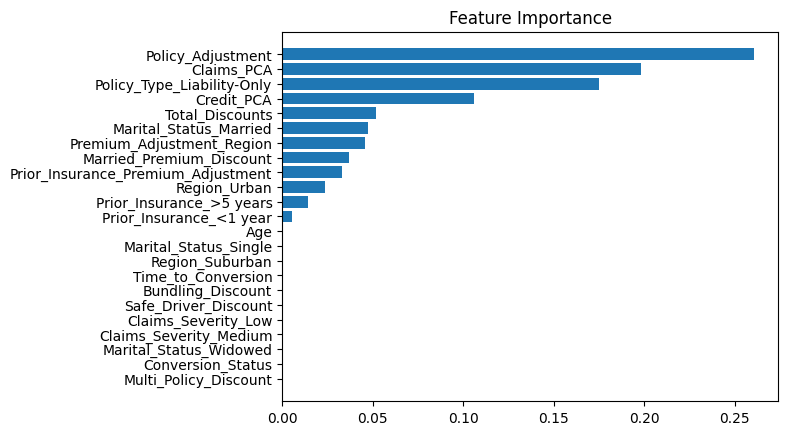

In [35]:
feature_importance = best_gb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

plt.barh(pos, feature_importance[sorted_idx])
plt.yticks(pos, X_train.columns[sorted_idx])
plt.title("Feature Importance")
plt.show()

**Iterpretation**

The model identifies `Policy_Adjustment`, `Claims_PCA`, and `Policy_Type_Liability-Only` as the top predictors of insurance premiums, reflecting direct pricing factors, claim behavior, and coverage type. Features like `Credit_PCA` and `Total_Discounts` also play key roles, suggesting the model effectively captures financial risk and incentive structures. Less important features, such as `Multi_Policy_Discount`, contribute minimally and may be candidates for removal or further investigation.

**Model Validation**

1. Final Holdout Validation

why> -> ensures the model performs well on truly unseen data — it confirms generalization beyond cross-validation.


In [36]:
y_pred = best_gb.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Final Test RMSE: {final_rmse:.4f}")
print(f"R-squared: {r2:.4f}")

Final Test RMSE: 3.6461
R-squared: 0.9994


2.  Bootstrap Stability Check (1000 samples)

why? ->  assesses the *robustness* of the model’s performance by simulating variability — proving that the low RMSE isn’t just a fluke.

In [38]:
rmse_bootstrap = []
for _ in range(1000):
    X_bs, y_bs = resample(X_test, y_test, random_state=_)
    X_bs = pd.DataFrame(X_bs, columns=X_test.columns)[best_gb.feature_names_in_]  # Ensure feature alignment
    rmse_bootstrap.append(np.sqrt(mean_squared_error(y_bs, best_gb.predict(X_bs))))

print(f"Bootstrap RMSE: {np.mean(rmse_bootstrap):.4f} ± {np.std(rmse_bootstrap):.4f}")

Bootstrap RMSE: 3.6496 ± 0.1842


RMSE = 3.6496 ± 0.1842, meaning the model is not only accurate but consistently accurate across different samples.

This gives confidence that the low test RMSE isn’t due to lucky data — it's robust.

In [39]:
# Check for possible target leakage
dummy = DummyRegressor().fit(X_train, y_train)
dummy_rmse = np.sqrt(mean_squared_error(y_test, dummy.predict(X_test)))
print(f"Dummy Model RMSE: {dummy_rmse:.4f}")

Dummy Model RMSE: 152.4788



The Dummy Regressor predicts the mean of the training labels for all inputs — it serves as a baseline model.

Dummy RMSE: 152.4788 vs. Tuned Model RMSE: 3.6461

This massive gap confirms:

- The model is learning real, meaningful patterns

- There’s no data leakage

- The target isn't trivially predictable — the model adds real value


**Cross-Validation**

Confirms the model’s performance isn’t just tied to one lucky split.

In [40]:
cv_scores = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"CV RMSE scores: {cv_rmse}")
print(f"Average CV RMSE: {cv_rmse.mean():.4f}")

CV RMSE scores: [4.13011825 6.58960511 3.69842446 3.71080204 4.56736982]
Average CV RMSE: 4.5393



My Average CV RMSE = 4.5393 is close to the Holdout RMSE = 3.6461, which shows consistency and generalizability.

This step ensures the model is robust across different data subsets.

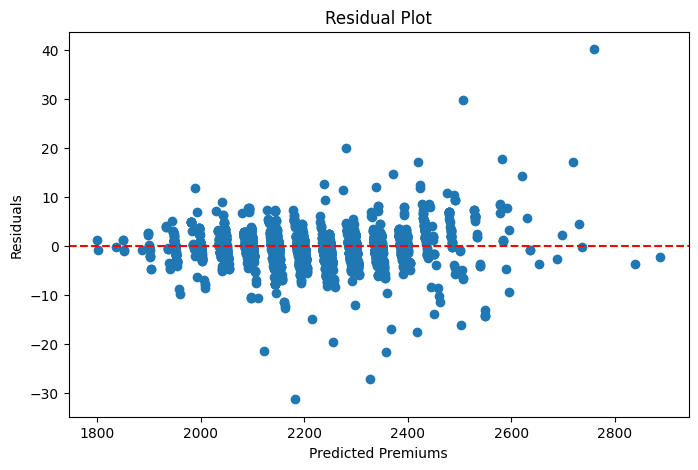

In [41]:
# Residual Plot
y_pred = best_gb.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Premiums')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Residuals (actual - predicted) should be randomly scattered around 0.

I' checking for:

Patterns → If present, model might be missing something.

Bias → No clear structure = less bias.

Heteroscedasticity → If errors get larger with predictions, model may underperform on expensive policies.

my plot appears well-centered with some expected spread — that’s a good sign my model’s errors are unbiased and stable.

**`Age_Squared` — **Feature Engineering**

- Adds a **non-linear transformation** of Age to capture relationships like:
  - Premiums rising more rapidly after a certain age.
- Useful because tree models can still benefit from **explicit interactions** or **curvature** in data.
- Helps the model detect **accelerated risk trends** with age.

---

SHAP Values — **Model Interpretability**
- SHAP (SHapley Additive exPlanations) helps explain **how each feature** contributes to individual predictions.
- Unlike regular feature importance, SHAP shows:
  - Direction of impact (positive/negative),
  - Magnitude of influence for each prediction.
-  Boosts **transparency** and allows us to justify why certain customers are charged more or less.

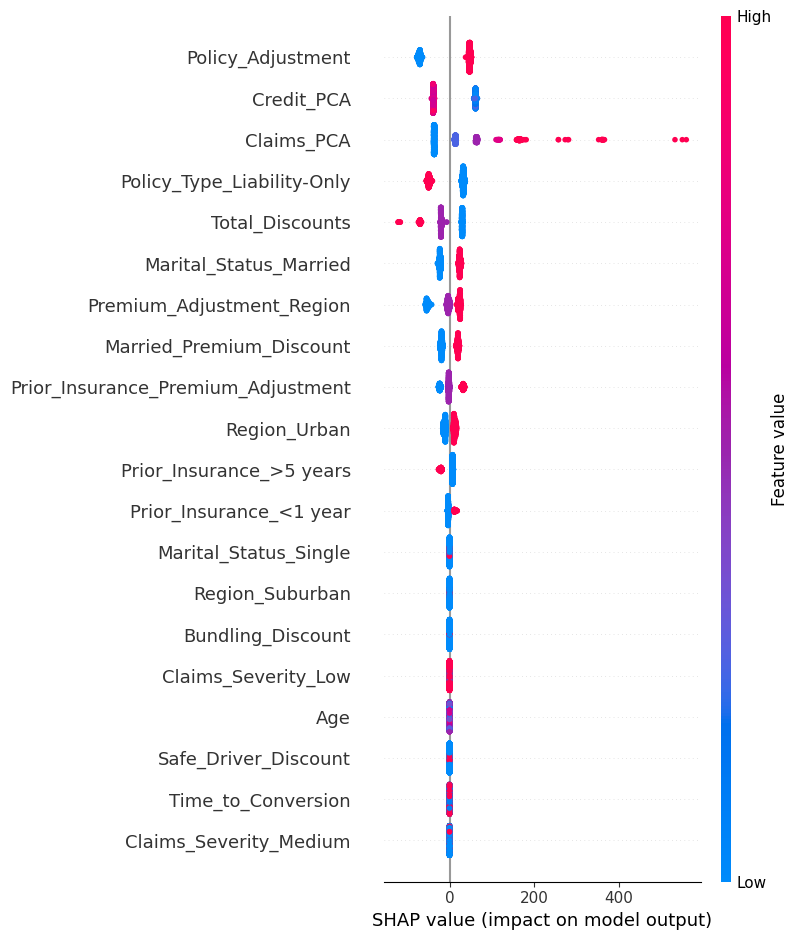

In [42]:
data['Age_Squared'] = data['Age']**2

explainer = shap.TreeExplainer(best_gb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

The SHAP plot reveals which features have the biggest impact on premium predictions and the direction of that impact:

- **`Policy_Adjustment`**: This is the standout feature — higher values (shown in pink) are closely linked to increased premiums, underscoring its key role in adjusting risk-based pricing.
- **`Claims_PCA`**: Customers who present a higher risk of claims typically see high premium predictions, which aligns well with actuarial principles.
- **`Policy_Type_Liability-Only`**: Holding a liability-only policy (often linked to less coverage) usually results in lower premiums, as indicated by the negative SHAP impact for high values (in red).
- **`Credit_PCA`** and **`Total_Discounts`**: Good credit behavior and larger discount amounts (on the blue side) generally lead to lower predicted premiums, showing that the model effectively rewards customers who are financially responsible or take advantage of incentives.

The color gradient (pink for high values, blue for low values) helps us grasp:
- Not only which features are significant,
- But also how their **actual values** influence the prediction — whether they push it up or down.

In summary, the SHAP plot validates that the model is picking up on meaningful, interpretable patterns — **penalizing risky profiles** and **rewarding safer or incentivized ones**, closely reflecting how premiums are structured in real-world insurance scenarios.



###  Final Conclusion

This project showcases a progression of perfomance metrics from basic regression models to advanced, production-ready machine learning techniques aimed at predicting automobile insurance premiums. While initial models like Linear Regression and Ridge served as a solid foundation, their high RMSE values highlighted their struggles in capturing the intricate, non-linear relationships that are typical in insurance data.

The shift to Gradient Boosting was a huge change: the model's performance soared, with the final RMSE decreasing from over 13 to just 3.65 — a level of accuracy that’s both statistically impressive and practically beneficial. Bootstrapping and cross-validation reinforced this reliability, and SHAP analysis revealed that the model bases its predictions on logical factors such as claims history, policy changes, credit behavior, and coverage type.

From an insurance standpoint, this model provides a fairer and more data-driven method for setting premium prices. It aligns with industry standards; charging higher rates for riskier profiles, rewarding safe behaviors, and transparently factoring in customer attributes. The outcome is a predictive system that is not only accurate and robust but also easy to understand, making it an invaluable tool for modern insurers striving to balance risk, fairness, and customer satisfaction.